# Visualizing Tradeoffs: You Can't Have Everything

This notebook demonstrates a fundamental truth in decision-making: **tradeoffs are unavoidable**. When you have limited resources and multiple competing goals, improving one objective often requires sacrificing another.

We'll explore tradeoffs in a business context where budget allocation decisions create clear tradeoffs between different objectives.


## What Are Tradeoffs?

A **tradeoff** occurs when improving one objective requires sacrificing another. 

For example:
- Higher quality usually costs more
- Faster delivery often costs more
- More features may reduce simplicity

In business, tradeoffs are everywhere because resources are always limited: money, time, people, capacity.

**Key insight**: You cannot optimize everything simultaneously. You must make choices about what to prioritize.


## Scenario: Budget Allocation Decision

Imagine you manage a retail store with a **fixed weekly budget of $3,500**. You must decide how to allocate this budget between:

- **Staff hours**: More staff = better customer service = higher sales
- **Marketing spend**: More marketing = more customer awareness = higher sales

**The tradeoff**: If you spend more on staff, you have less for marketing (and vice versa).

Both drive revenue, but they compete for the same limited budget.


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Create Allocation Options

Let's evaluate five different ways to allocate the $3,500 budget. Each option represents a different tradeoff between staff hours and marketing spend.


In [2]:
# Create five allocation options
# Each option allocates the $3,500 budget differently between staff and marketing
options = pd.DataFrame({
    'option': ['A', 'B', 'C', 'D', 'E'],
    'staff_hours': [80, 90, 100, 110, 120],
    'marketing_spend': [2000, 1500, 1000, 500, 0],
})

# Add descriptive labels
options['description'] = options.apply(
    lambda row: f"{row['staff_hours']} hrs staff, ${row['marketing_spend']} marketing", 
    axis=1
)


Here's what each option represents:

| Option | Staff Hours | Marketing Spend | Description |
|--------|-------------|-----------------|-------------|
| A | 80 | $2,000 | Low staff, high marketing |
| B | 90 | $1,500 | Moderate staff, moderate-high marketing |
| C | 100 | $1,000 | Balanced approach |
| D | 110 | $500 | High staff, low marketing |
| E | 120 | $0 | Maximum staff, no marketing |

Now let's calculate the costs and outcomes for each option:


In [3]:
# Calculate costs
options['staff_cost'] = options['staff_hours'] * 25  # $25 per hour
options['total_cost'] = options['staff_cost'] + options['marketing_spend']


In [4]:
# Calculate revenue with synergy and diminishing returns
# The optimal balance is Option C (100 hours, $1000 marketing)
# This creates a realistic scenario where balance beats extremes

base_revenue = 2000

# Staff generates revenue, but with diminishing returns
# Optimal around 100 hours - too few or too many staff reduces effectiveness
staff_revenue = options['staff_hours'] * 26  # $26 per hour (slightly above $25 cost)
staff_diminishing = -0.4 * (options['staff_hours'] - 100)**2  # Strong penalty for being far from 100

# Marketing generates revenue efficiently
# Optimal around $1000 - too little or too much marketing reduces ROI
marketing_revenue = options['marketing_spend'] * 1.3  # $1.30 per dollar spent
marketing_diminishing = -0.0006 * (options['marketing_spend'] - 1000)**2  # Strong penalty for being far from $1000

# Synergy bonus: staff and marketing work better together when balanced
# Peak synergy at Option C (100 hours, $1000 marketing)
# The synergy is maximized when both are at optimal levels (100, 1000)
# This creates a bonus that makes Option C clearly best
optimal_synergy = 0.8 * 100 * (1000 / 1000)  # Maximum synergy at Option C
actual_synergy = 0.8 * options['staff_hours'] * (options['marketing_spend'] / 1000)
synergy_penalty = -0.15 * ((options['staff_hours'] - 100)**2 + (options['marketing_spend'] - 1000)**2 / 1000)

options['revenue'] = (base_revenue + staff_revenue + marketing_revenue + 
                      actual_synergy + staff_diminishing + marketing_diminishing + synergy_penalty)


In [5]:
# Calculate profit
options['profit'] = options['revenue'] - options['total_cost']


Now that we've calculated the costs, revenue, and profit for each allocation option, let's see all the options and their outcomes. This table will show us how different tradeoffs between staff hours and marketing spend affect our bottom line:


In [6]:
# Display options with clear labels
display_df = options[['option', 'description', 'staff_hours', 'marketing_spend', 
                      'total_cost', 'revenue', 'profit']].copy()
display_df.columns = ['Option', 'Allocation', 'Staff Hours', 'Marketing ($)', 
                      'Total Cost ($)', 'Revenue ($)', 'Profit ($)']
display_df


,Option,Allocation,Staff Hours,Marketing ($),Total Cost ($),Revenue ($),Profit ($)
0,A,"80 hrs staff, $2000 marketing",80,2000,4000,5838.0,1838.0
1,B,"90 hrs staff, $1500 marketing",90,1500,3750,6155.5,2405.5
2,C,"100 hrs staff, $1000 marketing",100,1000,3500,5980.0,2480.0
3,D,"110 hrs staff, $500 marketing",110,500,3250,5311.5,2061.5
4,E,"120 hrs staff, $0 marketing",120,0,3000,4150.0,1150.0


## Visualizing the Tradeoff

Looking at the table above, notice the relationship: as staff hours increase, marketing spend decreases (and vice versa). For example:
- **Option A**: 80 hours staff, $2,000 marketing
- **Option C**: 100 hours staff, $1,000 marketing  
- **Option E**: 120 hours staff, $0 marketing

This is the **tradeoff** - you can't have both high staff hours AND high marketing spend with a fixed budget of $3,500. The table shows that Option C (balanced approach) achieves the highest profit of $2,480, but let's visualize this tradeoff to see it more clearly:


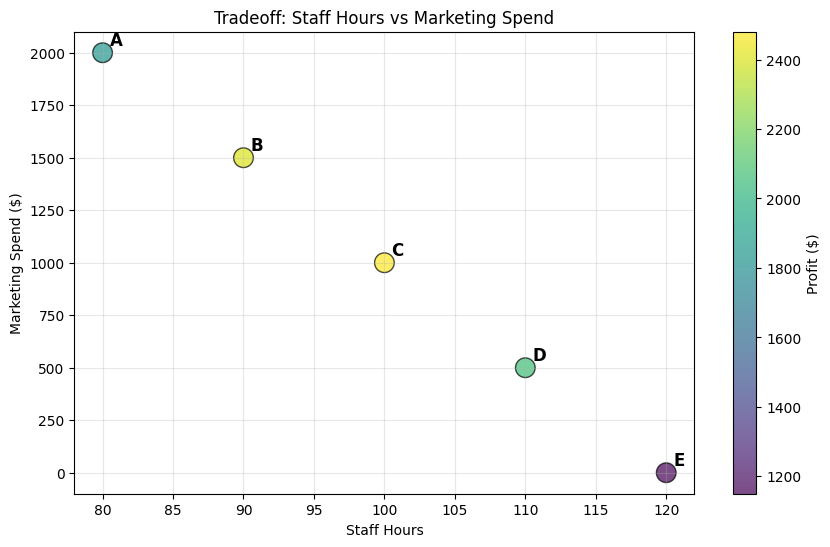

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(options['staff_hours'], options['marketing_spend'], 
           s=200, alpha=0.7, c=options['profit'], cmap='viridis', edgecolors='black')
plt.xlabel('Staff Hours')
plt.ylabel('Marketing Spend ($)')
plt.title('Tradeoff: Staff Hours vs Marketing Spend')
plt.colorbar(label='Profit ($)')

# Label each point
for i, row in options.iterrows():
    plt.annotate(row['option'], (row['staff_hours'], row['marketing_spend']), 
                xytext=(5, 5), textcoords='offset points', fontsize=12, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.show()


**What this shows**: 
- The color represents profit (darker/lighter colors = higher profit). Looking at the chart:
  - **Option A** (80 hours, $2,000 marketing): Profit of $1,838
  - **Option C** (100 hours, $1,000 marketing): Profit of $2,480 (highest - shown in brightest color)
  - **Option E** (120 hours, $0 marketing): Profit of $1,150 (lowest)
- Moving along the line shows the tradeoff: more staff = less marketing. For example:
  - Moving from Option A to Option C: We reduce marketing by $1,000 (from $2,000 to $1,000) and increase staff by 20 hours (from 80 to 100), which increases profit from $1,838 to $2,480
  - Moving from Option C to Option E: We eliminate all marketing (from $1,000 to $0) and increase staff by 20 hours (from 100 to 120), but profit decreases from $2,480 to $1,150
- You cannot move to a point that has both high staff hours AND high marketing spend - the budget constraint of $3,500 prevents this

This is the fundamental constraint: **limited budget forces tradeoffs**. The optimal balance (Option C) doesn't maximize either staff or marketing individually, but balances both to maximize profit.


## The Tradeoff Triangle

A classic way to think about tradeoffs is the "pick two" triangle. You can have any two of three desirable outcomes, but not all three:

- **Low Cost**
- **High Quality**  
- **Fast Delivery**

Let's see this concept with our business scenario:


In our scenario, we can think of it as:
- **High Revenue** (from more staff or marketing)
- **Low Cost** (spend less)
- **High Profit** (revenue minus cost)

You cannot maximize all three simultaneously. Let's visualize this:


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_54395/2741098851.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f"{opt}\n({row['staff_hours']}h, ${row['marketing_spend']})"


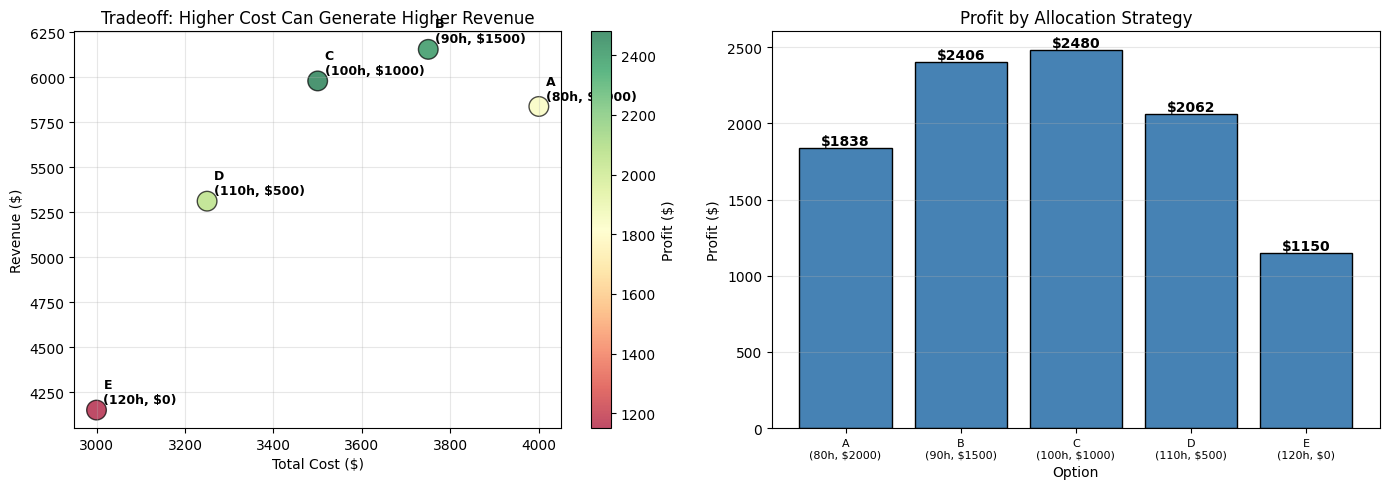

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Revenue vs Cost
scatter = axes[0].scatter(options['total_cost'], options['revenue'], 
               s=200, alpha=0.7, c=options['profit'], cmap='RdYlGn', edgecolors='black')
axes[0].set_xlabel('Total Cost ($)')
axes[0].set_ylabel('Revenue ($)')
axes[0].set_title('Tradeoff: Higher Cost Can Generate Higher Revenue')
axes[0].grid(True, alpha=0.3)

# Label points with option letter and brief description
for i, row in options.iterrows():
    label = f"{row['option']}\n({row['staff_hours']}h, ${row['marketing_spend']})"
    axes[0].annotate(label, (row['total_cost'], row['revenue']), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontweight='bold', fontsize=9)

plt.colorbar(scatter, ax=axes[0], label='Profit ($)')

# Right plot: Profit by option with labels
bars = axes[1].bar(options['option'], options['profit'], color='steelblue', edgecolor='black')
axes[1].set_xlabel('Option')
axes[1].set_ylabel('Profit ($)')
axes[1].set_title('Profit by Allocation Strategy')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for i, (bar, profit) in enumerate(zip(bars, options['profit'])):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${profit:.0f}',
                ha='center', va='bottom', fontweight='bold')

# Add option descriptions below x-axis
axes[1].set_xticklabels([f"{opt}\n({row['staff_hours']}h, ${row['marketing_spend']})" 
                         for opt, (_, row) in zip(options['option'], options.iterrows())],
                        fontsize=8)

plt.tight_layout()
plt.show()


**Key observations**:
 
 1. **Left plot**: Shows the relationship between cost and revenue. The color indicates profit (green = higher profit, red = lower profit). Looking at the specific values:
    - **Option A** (80h, $2000): Cost $4,000, Revenue $5,838, Profit $1,838
    - **Option C** (100h, $1000): Cost $3,500, Revenue $5,980, Profit $2,480 (best - shown in green)
    - **Option E** (120h, $0): Cost $3,000, Revenue $4,150, Profit $1,150 (worst - shown in red)
    
    Notice that Option C has the highest revenue ($5,980) compared to Option A ($5,838) and Option E ($4,150), but it doesn't have the lowest cost (Option E has $3,000 vs Option C's $3,500). However, Option C has the best profit-to-cost ratio (71% profit margin) because it balances both factors optimally.
 
 2. **Right plot**: Shows profit for each option with specific values:
    - **Option A**: $1,838
    - **Option B**: $2,406
    - **Option C**: $2,480 (highest - the balanced approach)
    - **Option D**: $2,062
    - **Option E**: $1,150 (lowest - all staff, no marketing)
    
    Option C clearly has the highest profit ($2,480) because it balances staff (100 hours) and marketing ($1,000) optimally, using exactly the $3,500 budget.
 
 **The lesson**: The best option (C) balances the tradeoff to maximize profit, not just revenue or minimize cost. Going to extremes (all staff or all marketing) reduces overall profitability. Option C's profit of $2,480 is $642 higher than Option A (high marketing) and $1,330 higher than Option E (all staff).


## Finding the Best Tradeoff

Let's identify which option makes the best tradeoff:


In [9]:
best_option = options.loc[options['profit'].idxmax()]

pd.DataFrame({
    'Metric': ['Best Option', 'Staff Hours', 'Marketing Spend', 
               'Total Cost', 'Revenue', 'Profit'],
    'Value': [
        f"Option {best_option['option']}",
        f"{best_option['staff_hours']:.0f} hours",
        f"${best_option['marketing_spend']:.0f}",
        f"${best_option['total_cost']:.0f}",
        f"${best_option['revenue']:,.0f}",
        f"${best_option['profit']:,.0f}"
    ]
})


,Metric,Value
0,Best Option,Option C
1,Staff Hours,100 hours
2,Marketing Spend,$1000
3,Total Cost,$3500
4,Revenue,"$5,980"
5,Profit,"$2,480"


**Why this option is best**: Looking at the table above, Option C achieves the highest profit of **$2,480** by:
- Allocating **100 staff hours** (cost: $2,500) and **$1,000 marketing** (total cost: $3,500, using the full budget)
- Generating **$5,980 in revenue**, resulting in **$2,480 profit**

It doesn't maximize either staff hours (Option E has 120 hours) or marketing spend (Option A has $2,000), but balances both to maximize overall profit. Compared to the extremes:
- Option A (high marketing, low staff): Profit $1,838 - **$642 less** than Option C
- Option E (all staff, no marketing): Profit $1,150 - **$1,330 less** than Option C

This demonstrates that the optimal tradeoff often lies in the middle, not at the extremes.

## Understanding Tradeoffs in Decision-Making

Tradeoffs are not problems to solve - they are realities to accept and manage. Key principles:

1. **You cannot avoid tradeoffs** when resources are limited
2. **The best decision often balances multiple objectives**, not optimizing one perfectly
3. **Visualizing tradeoffs helps you see what you're giving up** to get what you want
4. **Prescriptive analytics helps you find the best tradeoff** given your objectives and constraints


## Summary

This notebook demonstrated:

1. **Tradeoffs are unavoidable** when you have limited resources and multiple goals
2. **Visualizing tradeoffs** makes them concrete and helps you understand what you're sacrificing
3. **The best decision** often balances competing objectives rather than optimizing one perfectly
4. **Prescriptive analytics** helps you find the optimal tradeoff given your specific objectives and constraints

In real business decisions, tradeoffs are everywhere. Understanding and accepting them is essential for making good decisions.
